### Week 1 task by Denis Khryashchev

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr as correlation
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
%matplotlib inline

#### Reading the dataset and creating the function to plot and describe

In [2]:
# Reading the dataset from url
url = "http://www.math.csi.cuny.edu/~mvj/GC-DataMining/static/w1task.csv"
df = pd.read_csv(url)

# # or from the local folder 
# df = pd.read_csv('w1task.csv')
df.head(5)

,dataset,x,y
0,d,55.3846,97.1795
1,d,51.5385,96.0256
2,d,46.1538,94.4872
3,d,42.8205,91.4103
4,d,40.7692,88.3333


In [3]:
# Function to get means, deviations, correlation and scatter plot
def describe(X, Y, title):
    x_mean, y_mean, x_std, y_std = np.mean(X), np.mean(Y), np.std(X), np.std(Y)
    lincor = correlation(X, Y)[0]
    fig, ax = plt.subplots(figsize = (14, 7))
    plt.xlabel('X', fontsize = 17)
    plt.ylabel('Y', fontsize = 17)
    plt.title(title, fontsize = 20)
    ax.set_xlim(np.min(X), int(np.max(X)*1.6))
    plt.scatter(X, Y, label = 'Actual data')
    plt.plot(-10, -10, label = r'$\mu_Y=$'+str(x_mean))
    plt.plot(-10, -10, label = r'$\mu_Y=$'+str(x_std))
    plt.plot(-10, -10, label = r'$\sigma_X=$'+str(y_mean))
    plt.plot(-10, -10, label = r'$\sigma_X=$'+str(y_std))
    plt.plot(-10, -10, label = r'$\rho(X,Y)=$'+str(lincor))
    ax.grid(True)
    regression = np.polyfit(X, Y, 1)
    mapping = np.poly1d(regression) 
    plt.plot(X, mapping(X), 'g-', linewidth = 5, label = 'Regression line')
    fig.legend(fontsize = 22, frameon= True, edgecolor = 'black', loc=5) 
    
    fig, ax = plt.subplots(figsize = (14, 7))
    plt.xlabel('Time', fontsize = 17)
    plt.ylabel('Value', fontsize = 17)
    ax.grid(True)
    plt.plot(range(len(X)), X, label = title + ' time series of X')
    leg = plt.legend(fontsize = 22, frameon= True, edgecolor = 'black')
    fig, ax = plt.subplots(figsize = (14, 7))
    plt.xlabel('Time', fontsize = 17)
    plt.ylabel('Value', fontsize = 17)
    ax.grid(True)
    plt.plot(range(len(Y)), Y, label = title + ' time series of Y')
    leg = plt.legend(fontsize = 22, frameon= True, edgecolor = 'black')
    return True

#### Extracting different subsets and plotting / describing everything

In [4]:
# List subsets
datasets = np.unique(df['dataset'])
print datasets, len(datasets)

['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm'] 13


#### Global

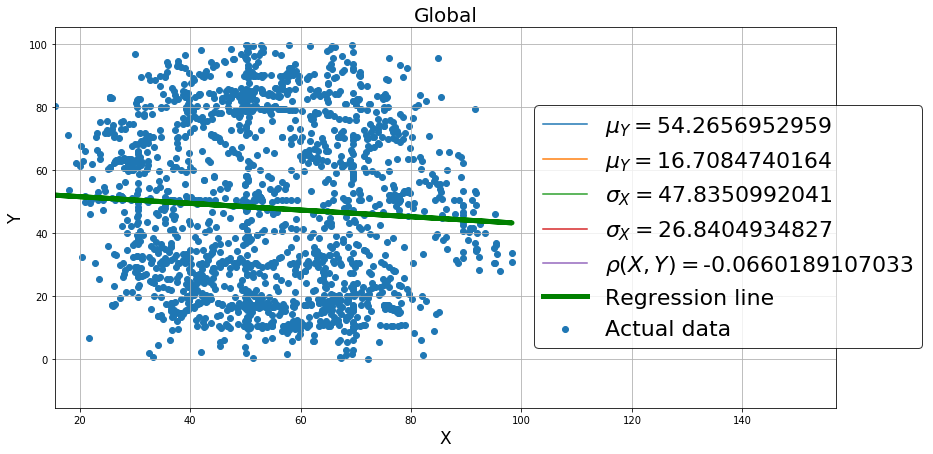

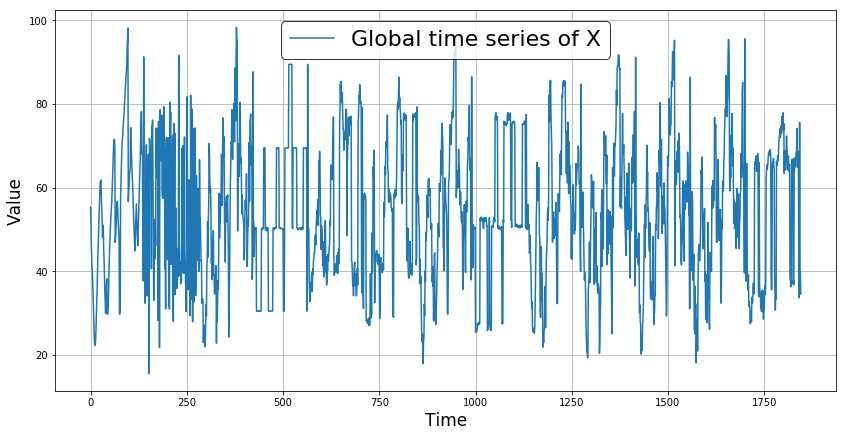

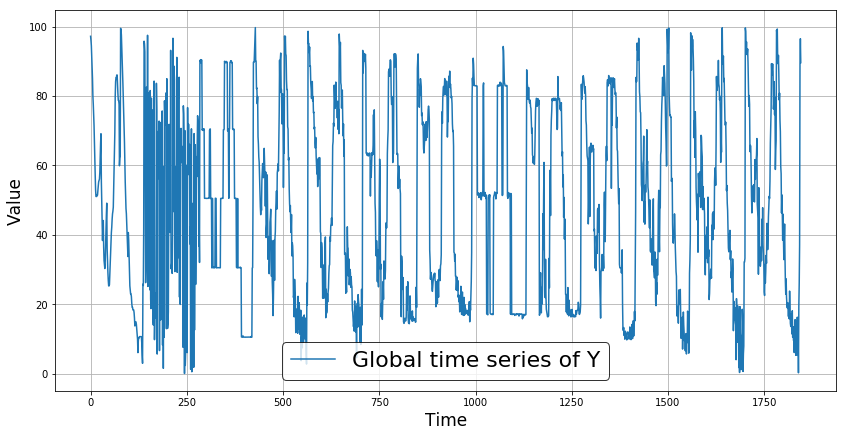

In [5]:
_ = describe(list(df['x']), list(df['y']), 'Global')

#### Everything else

C:\Users\Denis\Anaconda2\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


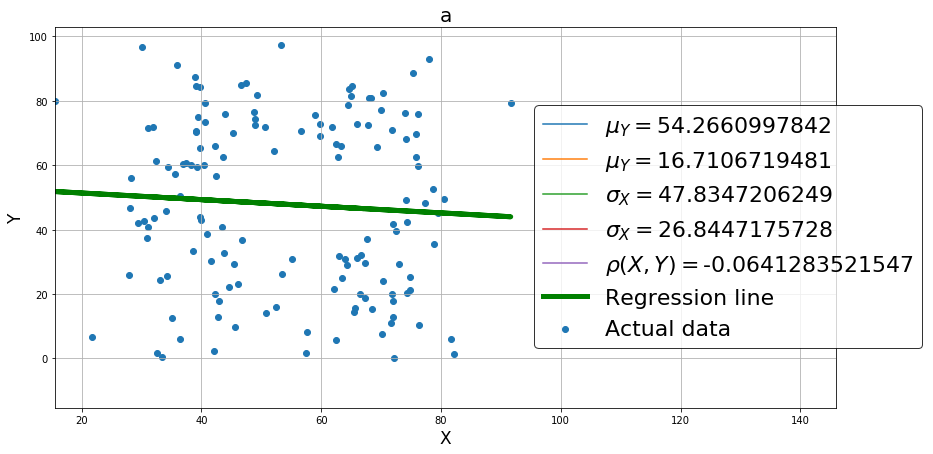

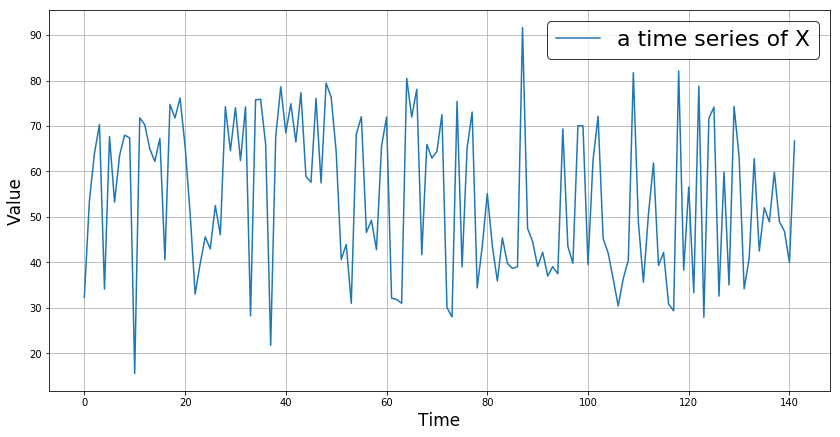

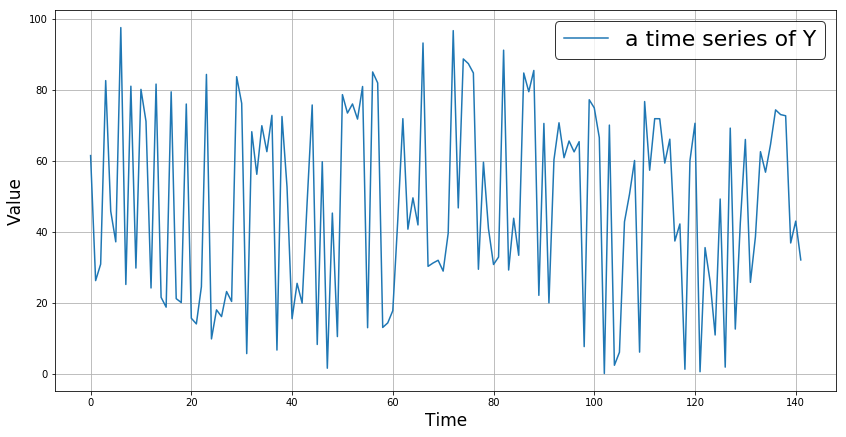

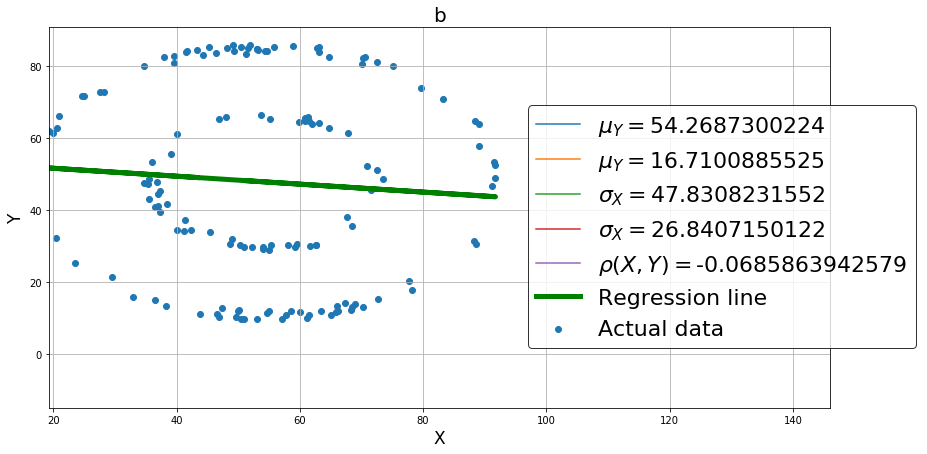

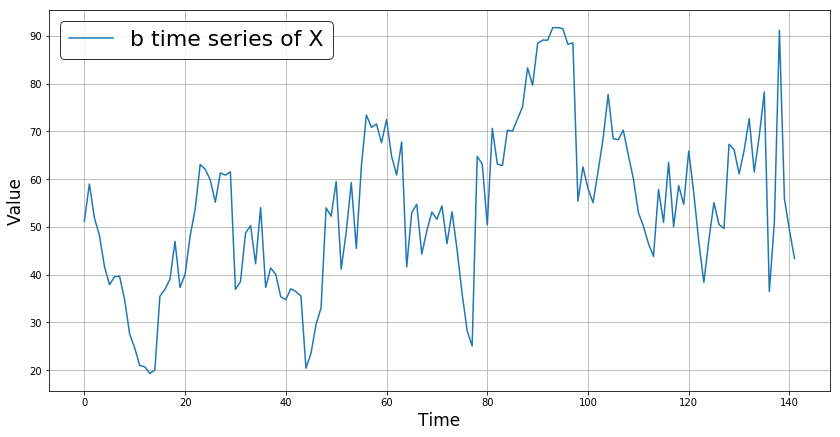

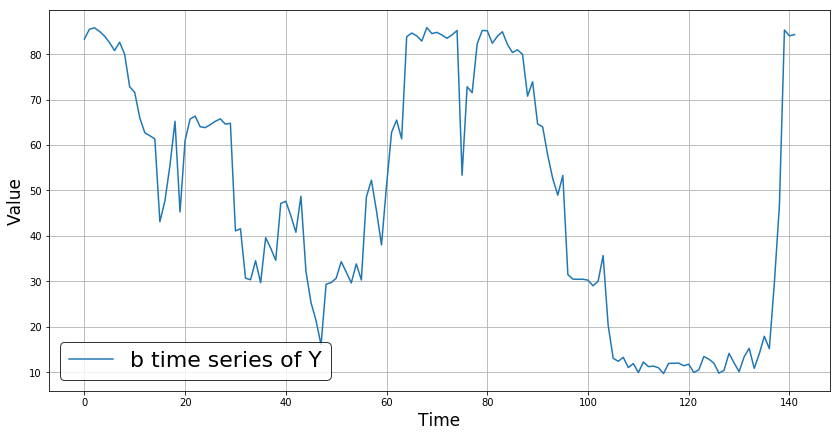

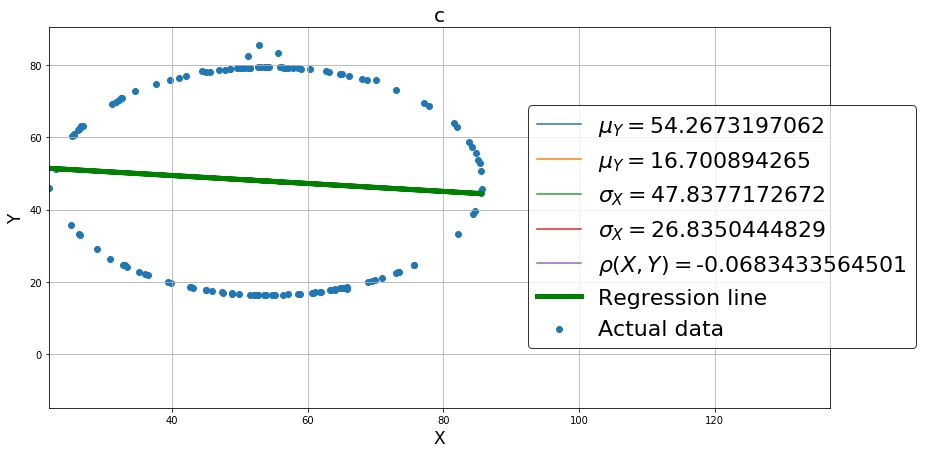

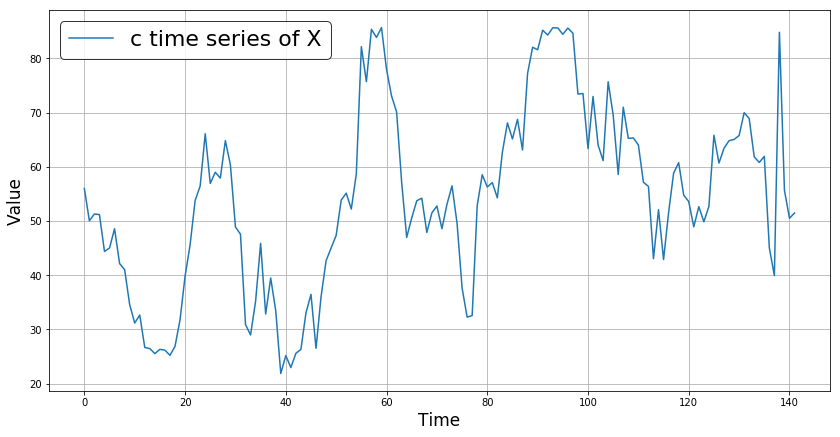

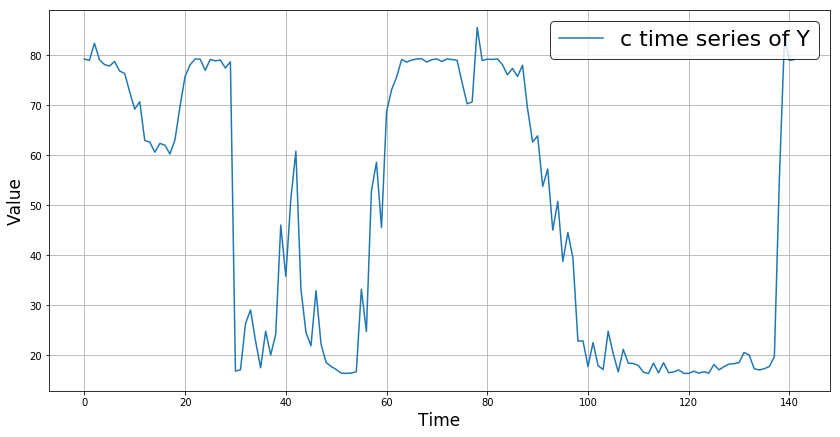

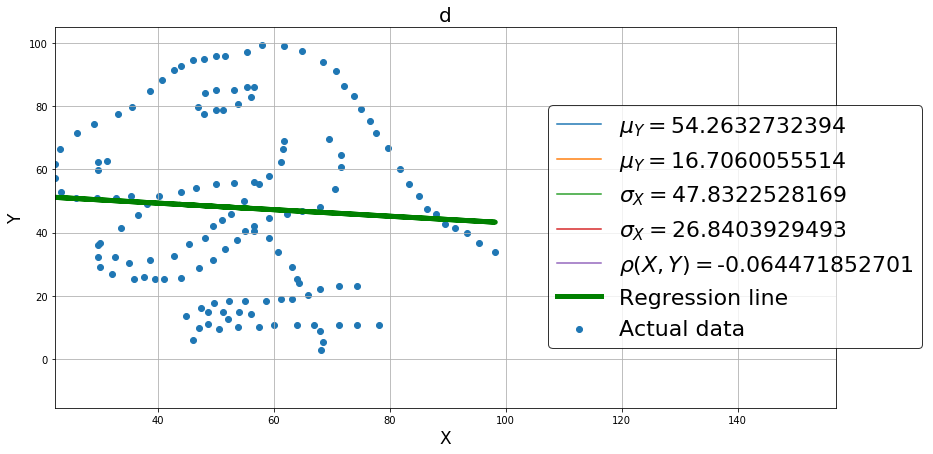

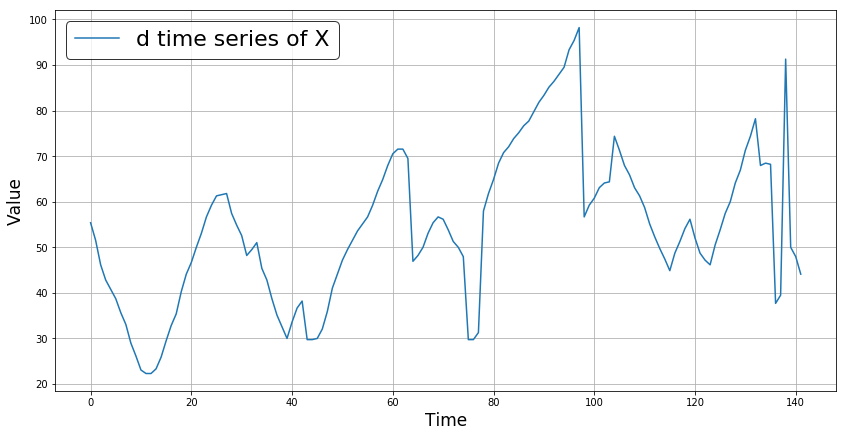

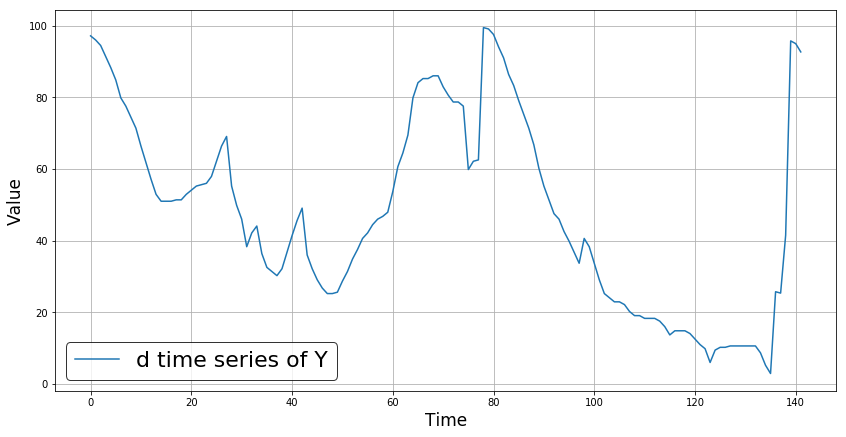

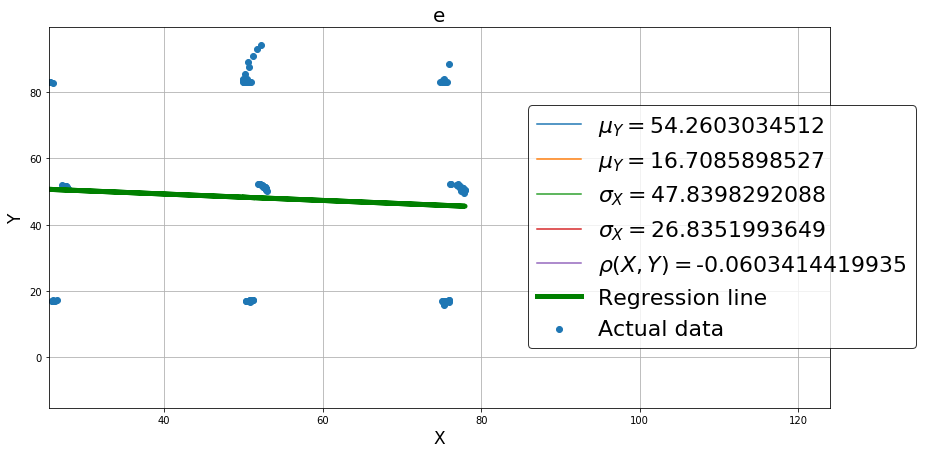

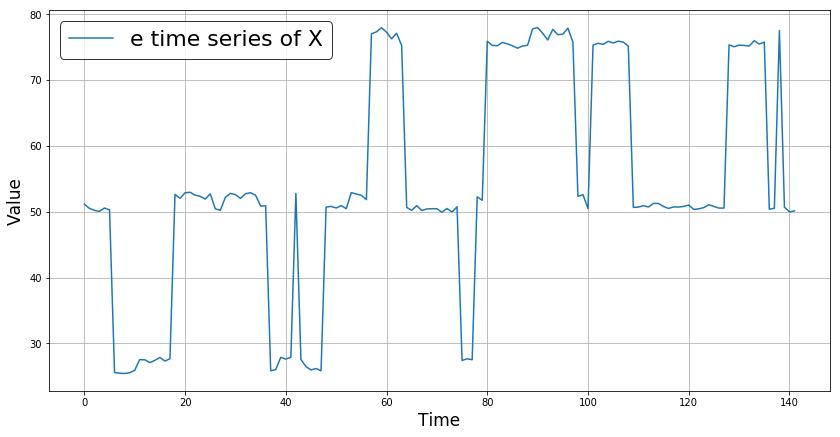

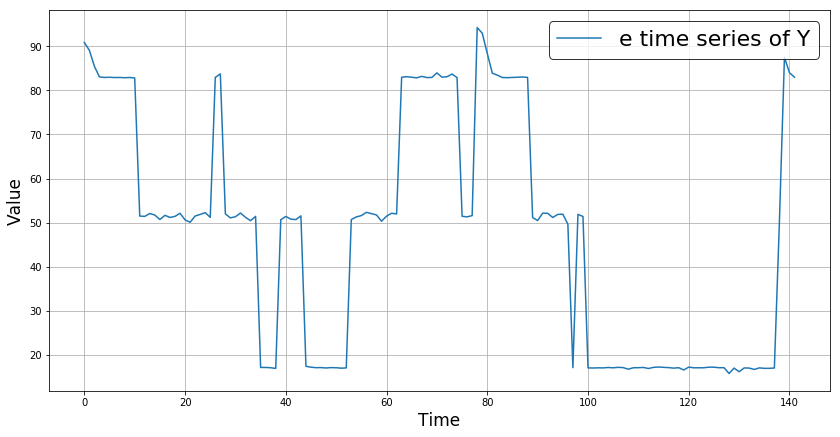

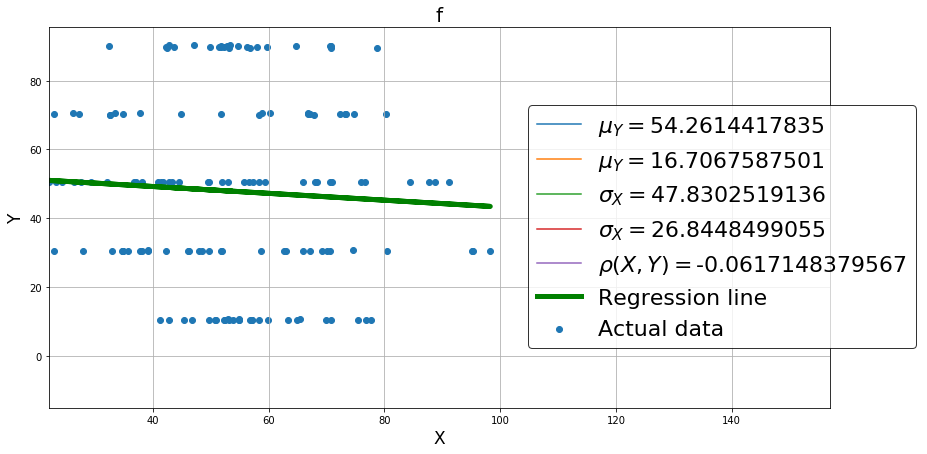

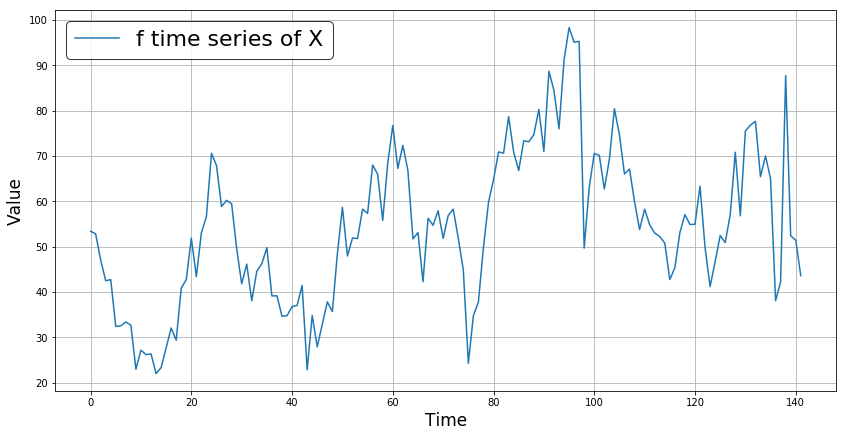

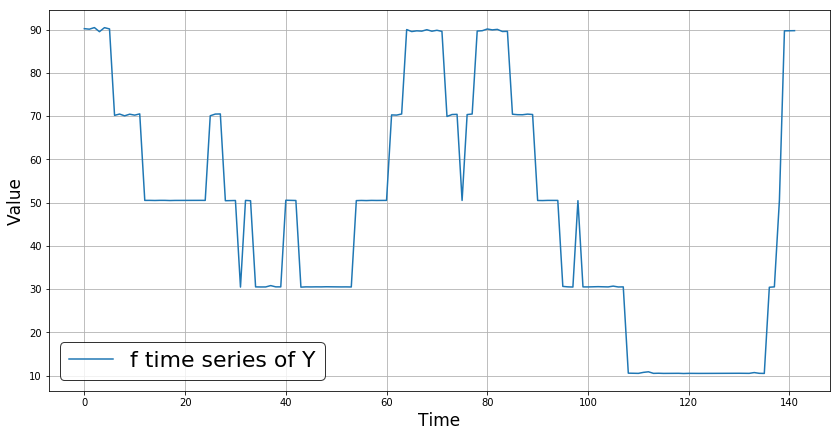

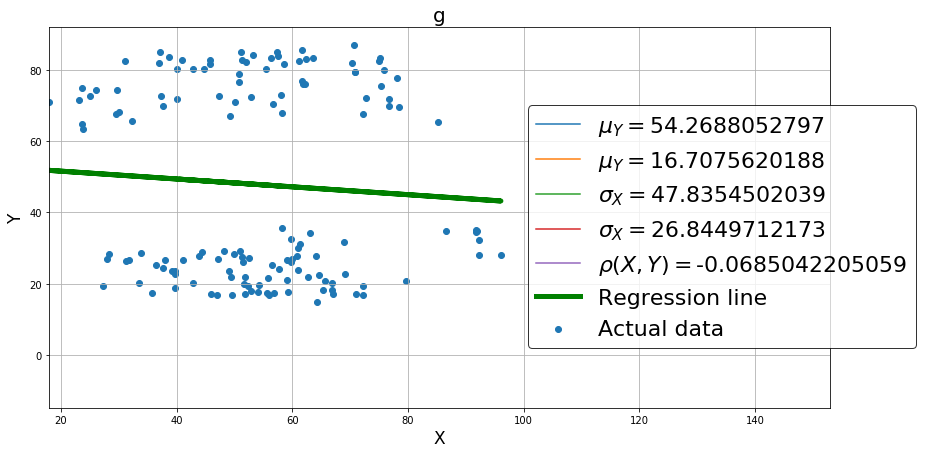

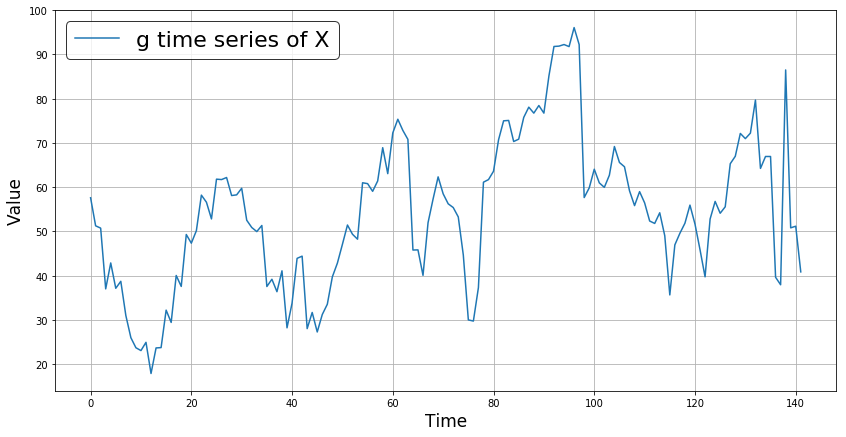

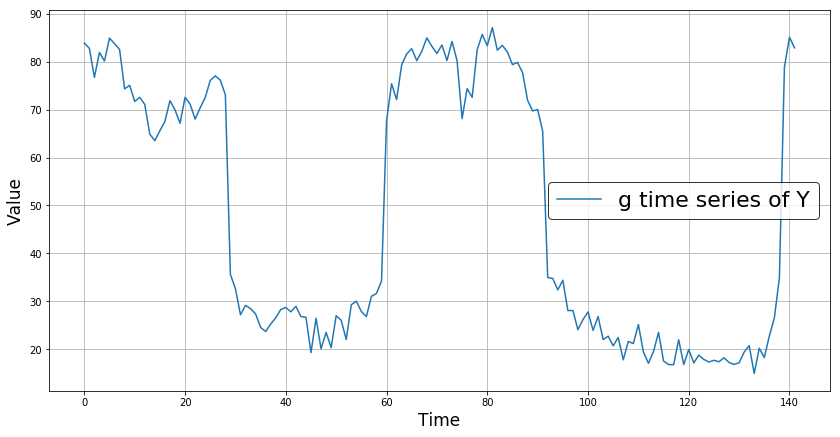

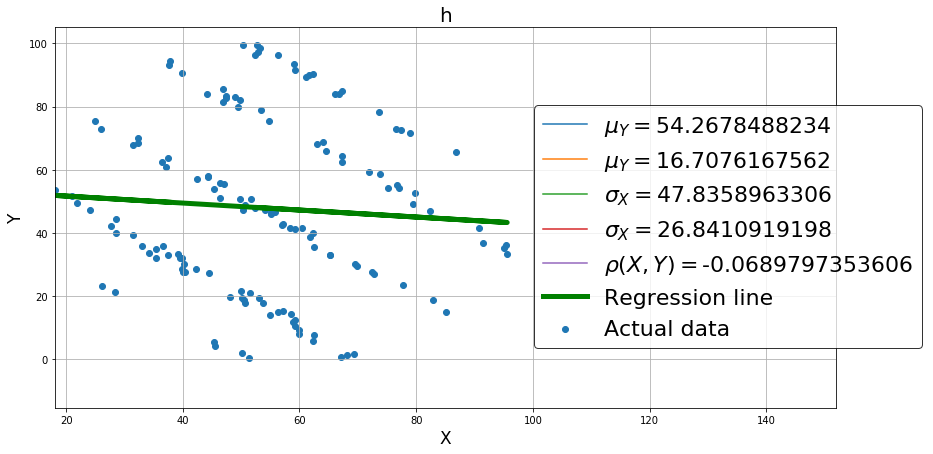

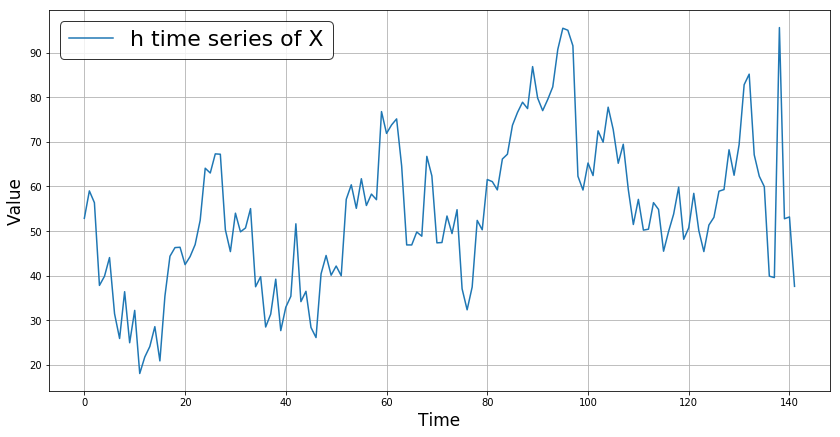

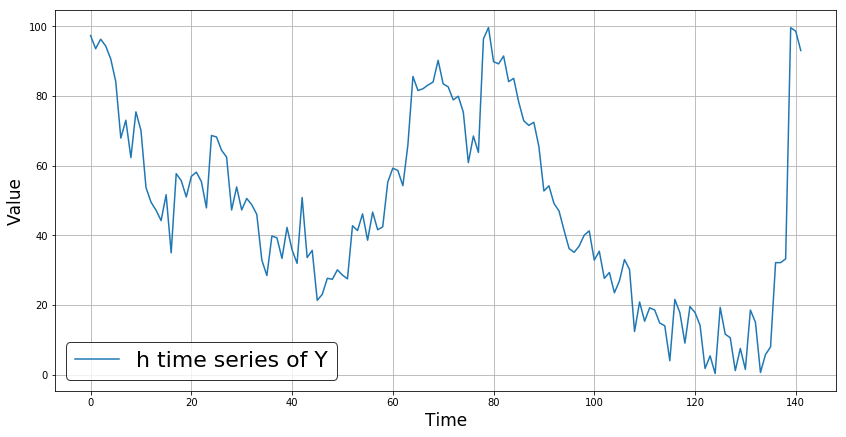

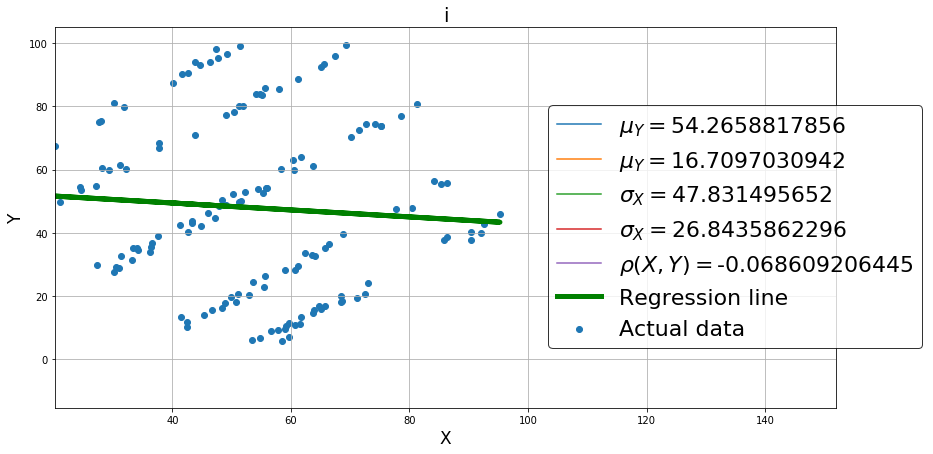

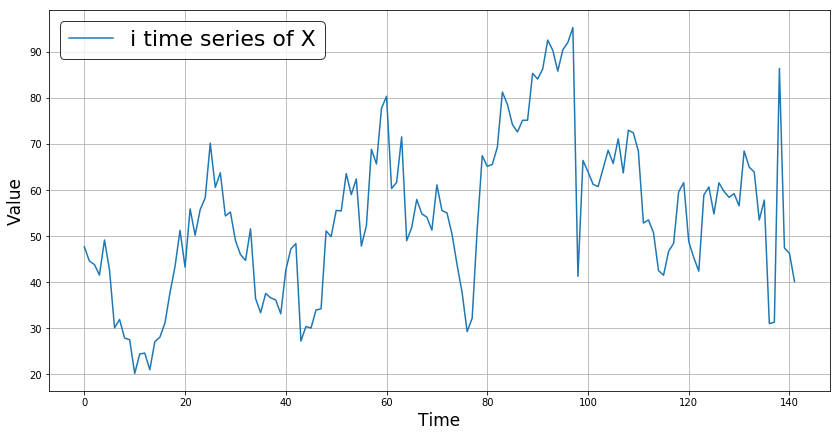

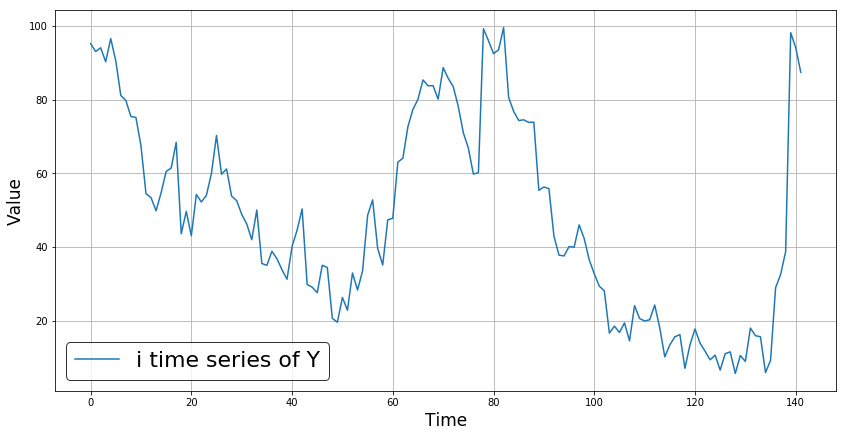

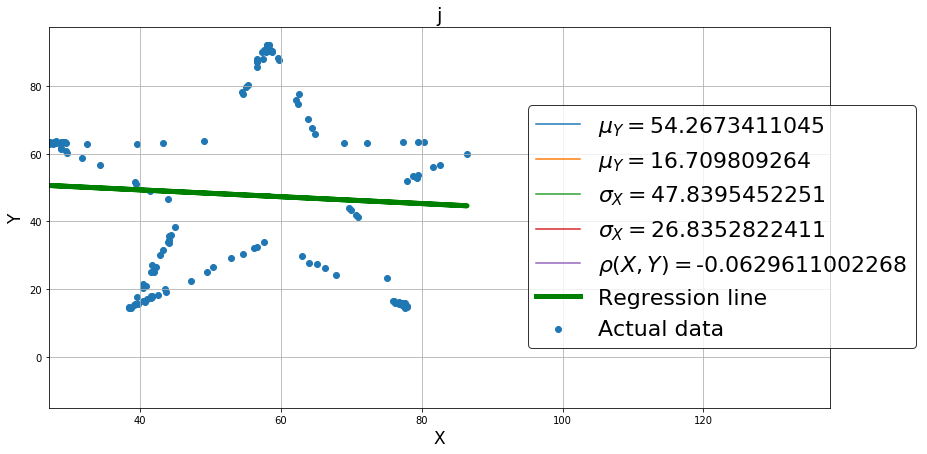

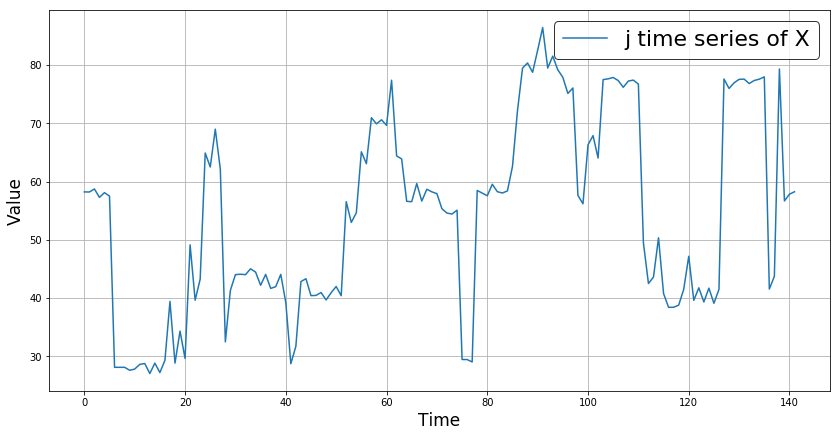

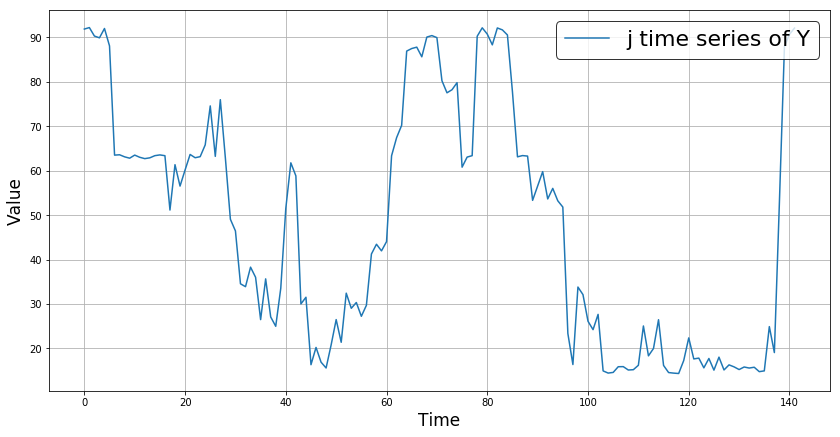

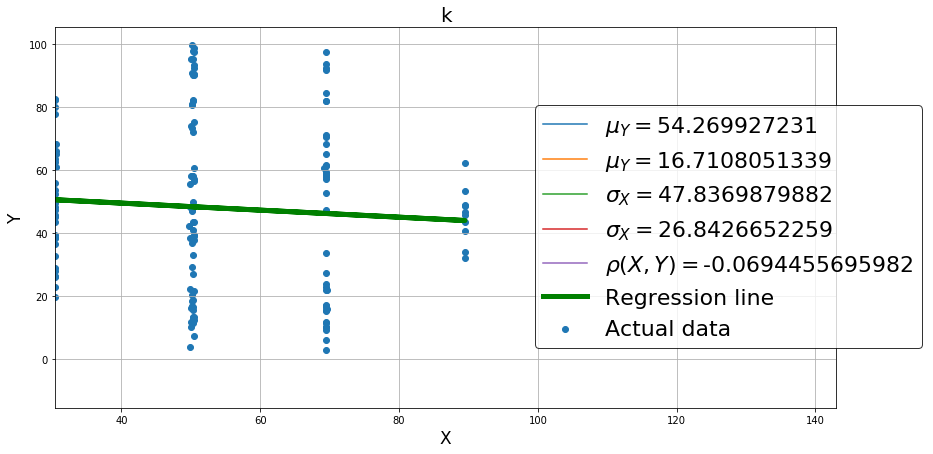

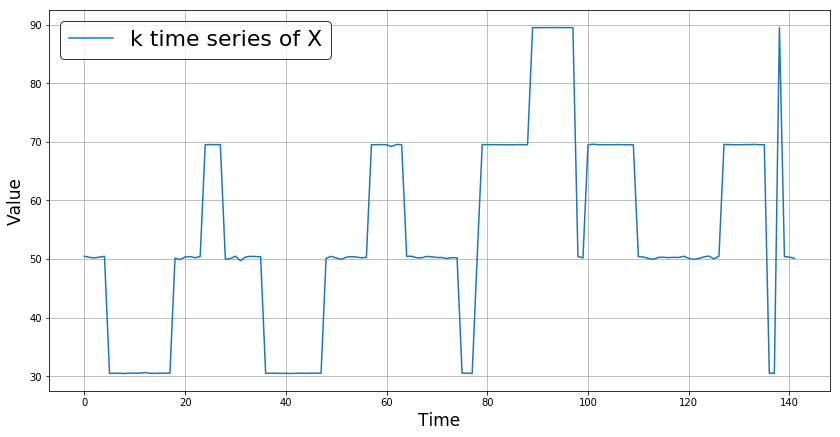

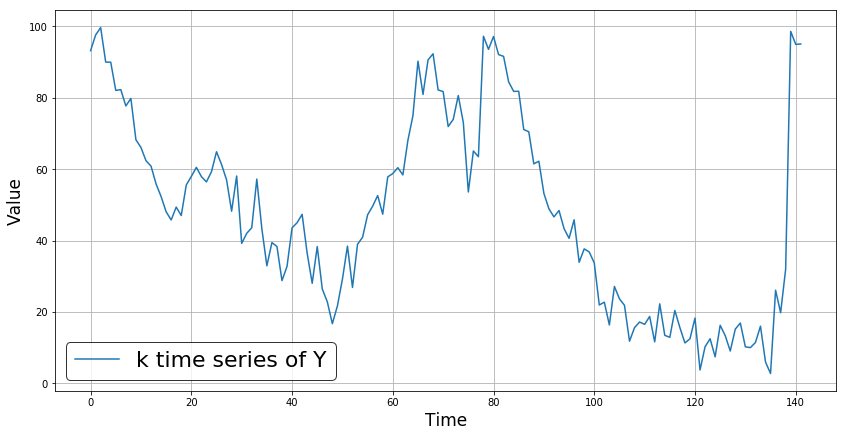

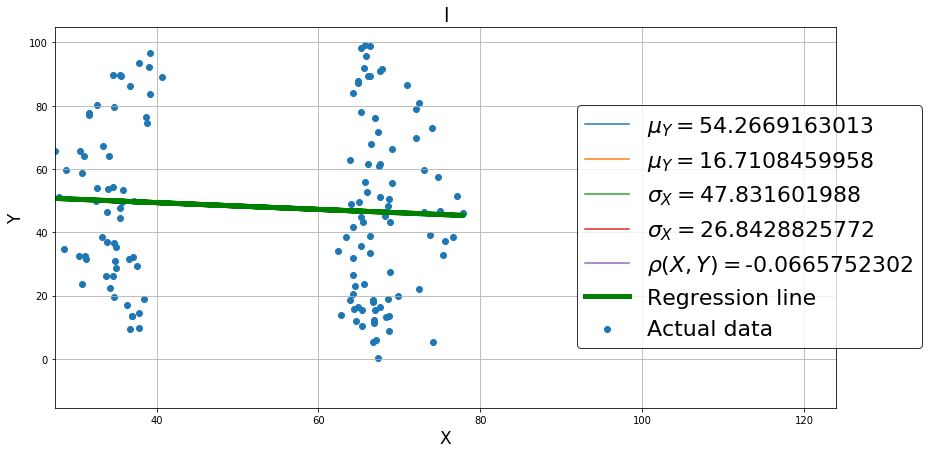

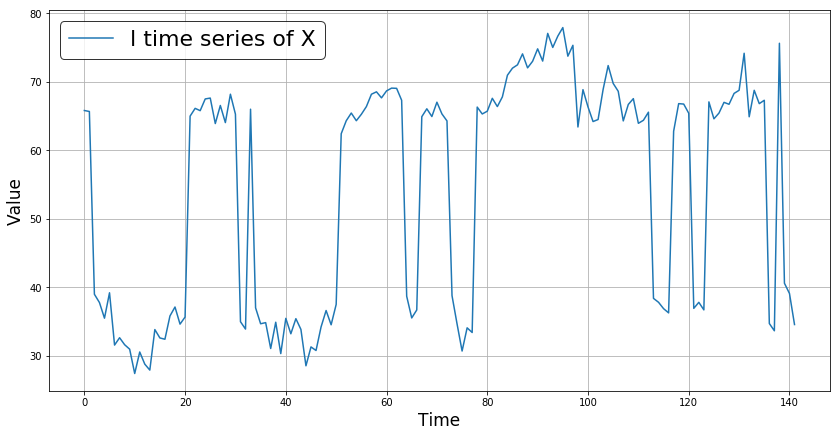

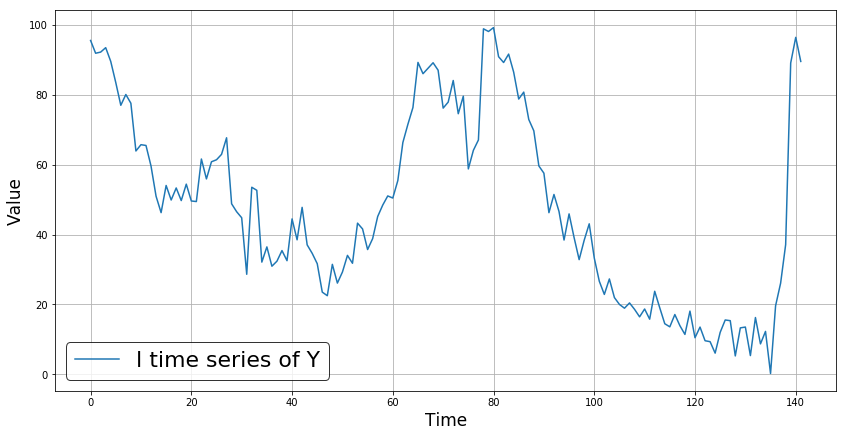

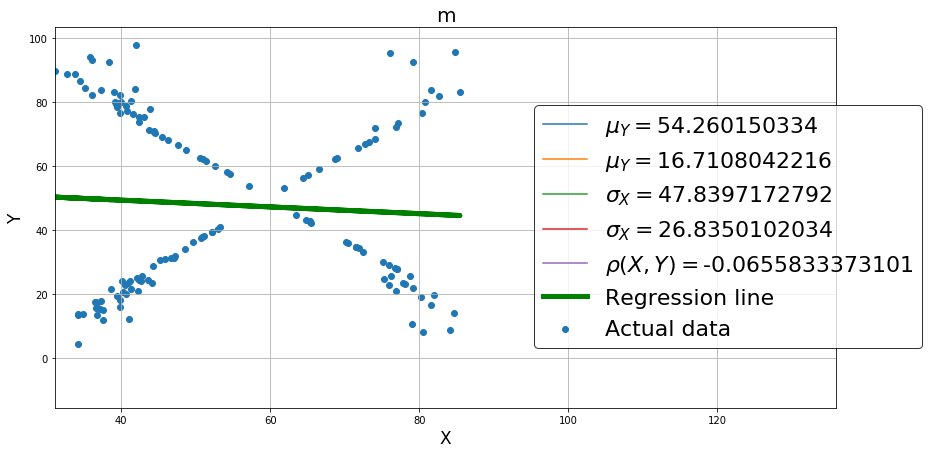

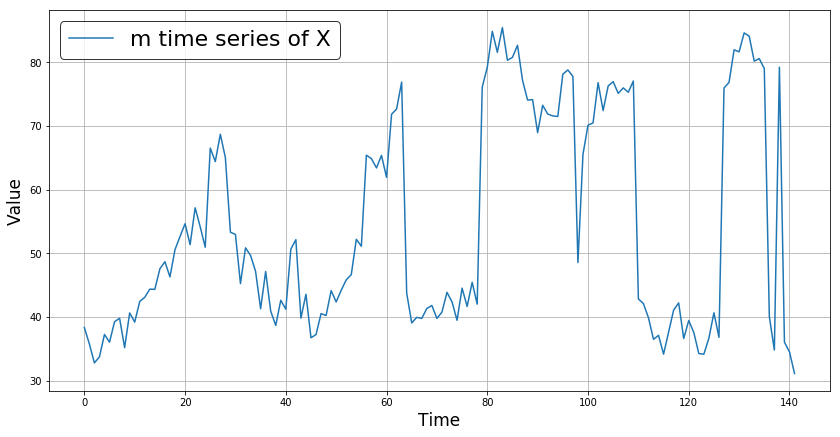

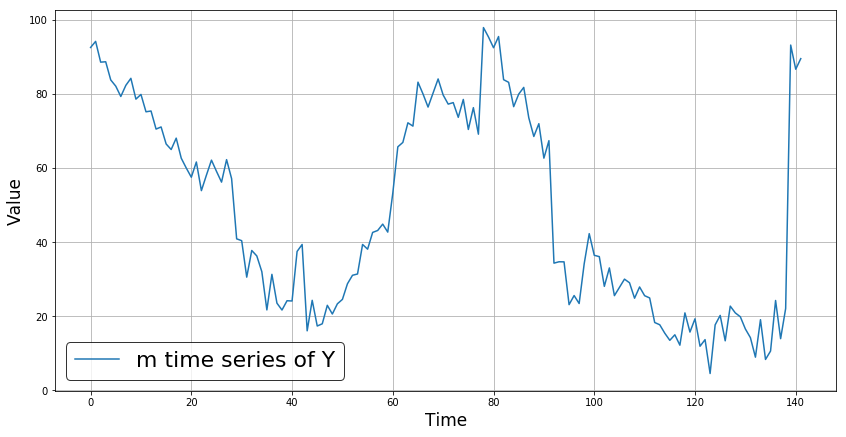

In [6]:
for name in datasets:
       _ = describe(list(df[df['dataset'] == name]['x']), list(df[df['dataset'] == name]['y']), name)